In [2]:
!pip install klib

In [17]:
#Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import klib

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [21]:
X, y = make_classification(n_samples=5000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Stacking**

In [22]:
# Base models
base_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42, n_estimators=100)),
]

In [23]:
# 1. Stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)
stacking_model.fit(X_train, y_train)
stacking_preds = stacking_model.predict(X_test)
# Stacking accuracy
stacking_accuracy = accuracy_score(y_test, stacking_preds)
print(f"Stacking Accuracy: {stacking_accuracy:.2f}")

Stacking Accuracy: 0.92


# **Blending**

In [24]:
X_train_blend, X_val, y_train_blend, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
#Train base models
for name, model in base_models:
    model.fit(X_train_blend, y_train_blend)

val_preds = np.column_stack([model.predict(X_val) for _, model in base_models])

In [26]:
meta_model = LogisticRegression()
meta_model.fit(val_preds, y_val)

test_preds = np.column_stack([model.predict(X_test) for _, model in base_models])
blending_preds = meta_model.predict(test_preds)
#Blending accuracy
blending_accuracy = accuracy_score(y_test, blending_preds)
print(f"Blending Accuracy: {blending_accuracy:.2f}")

Blending Accuracy: 0.92


#**Bagging**

In [27]:
# Bagging
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")

Bagging Classifier Accuracy: 0.9160


#**Boosting**

In [28]:
# Boosting (AdaBoost)
boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)
print(f"Boosting Classifier (Ada Boosting) Accuracy: {boosting_accuracy:.4f}")

Boosting Classifier (Ada Boosting) Accuracy: 0.8900


#**Comparing**

In [29]:
results = pd.DataFrame({
    'Model': ['Stacking (Logistic Regression)', 'Blending (Logistic Regression)', 'Bagging (Decision Tree)', 'Boosting (Ada Boosting)'],
    'Accuracy': [stacking_accuracy, blending_accuracy, bagging_accuracy, boosting_accuracy]
}).sort_values(by='Accuracy', ascending=False)

print("\nModel Comparison:\n")
print(results)


Model Comparison:

                            Model  Accuracy
1  Blending (Logistic Regression)     0.923
0  Stacking (Logistic Regression)     0.917
2         Bagging (Decision Tree)     0.916
3         Boosting (Ada Boosting)     0.890


<ipython-input-30-d65233dc72ef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis')


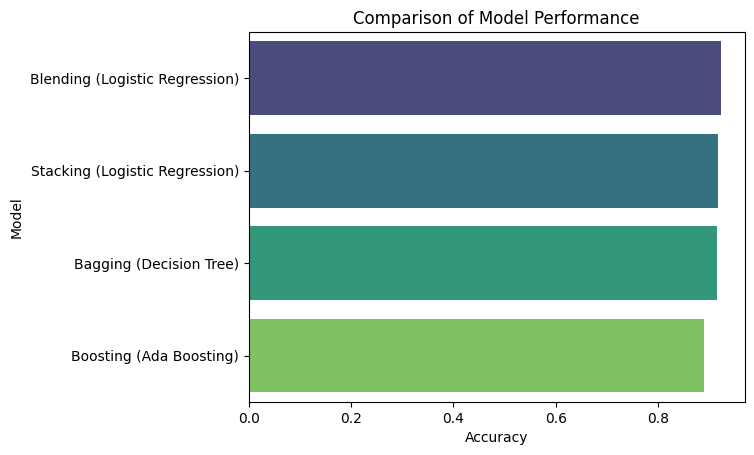

In [30]:
sns.barplot(x='Accuracy', y='Model', data=results, palette='viridis')
plt.title('Comparison of Model Performance')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

# **Data Preprocessing**

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project15/train_short.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project15/test_short.csv')

In [ ]:
train.head()

,current_age,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,amount,merchant_city,mcc,card_type,has_chip,credit_limit,account_age,card_brand
0,89,Female,33.84,-118.35,31496,68010,0,704,18.01,ONLINE,4121,Credit,YES,20800,14,Amex
1,52,Male,39.77,-86.14,14691,29957,60321,624,3.51,Indianapolis,5541,Debit,YES,11154,20,Mastercard
2,66,Male,26.18,-98.11,10091,20577,60152,825,2.58,San Benito,5942,Credit,YES,4100,15,Visa
3,31,Female,34.14,-118.46,51976,105963,106266,684,39.64,ONLINE,4784,Credit,YES,29800,16,Visa
4,51,Female,44.96,-93.26,40364,82298,182301,789,29.92,Minneapolis,5812,Credit,YES,20900,15,Mastercard


In [ ]:
train.isnull().sum()

,0
current_age,0
gender,0
latitude,0
longitude,0
per_capita_income,0
yearly_income,0
total_debt,0
credit_score,0
amount,0
merchant_city,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876791 entries, 0 to 2876790
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   current_age        int64  
 1   gender             object 
 2   latitude           float64
 3   longitude          float64
 4   per_capita_income  int64  
 5   yearly_income      int64  
 6   total_debt         int64  
 7   credit_score       int64  
 8   amount             float64
 9   merchant_city      object 
 10  mcc                int64  
 11  card_type          object 
 12  has_chip           object 
 13  credit_limit       int64  
 14  account_age        int64  
 15  card_brand         object 
dtypes: float64(3), int64(8), object(5)
memory usage: 351.2+ MB


In [ ]:
label_en = LabelEncoder()

categorical_columns = ['gender', 'merchant_city', 'card_type', 'has_chip', 'card_brand']

for col in categorical_columns:
    train[col] = label_en.fit_transform(train[col])
    test[col] = label_en.fit_transform(test[col])

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2876791 entries, 0 to 2876790
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   current_age        int64  
 1   gender             int64  
 2   latitude           float64
 3   longitude          float64
 4   per_capita_income  int64  
 5   yearly_income      int64  
 6   total_debt         int64  
 7   credit_score       int64  
 8   amount             float64
 9   merchant_city      int64  
 10  mcc                int64  
 11  card_type          int64  
 12  has_chip           int64  
 13  credit_limit       int64  
 14  account_age        int64  
 15  card_brand         int64  
dtypes: float64(3), int64(13)
memory usage: 351.2 MB


In [ ]:
test.head()

,current_age,gender,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,amount,merchant_city,mcc,card_type,has_chip,credit_limit,account_age,card_brand
0,51,0,42.68,-89.01,21278,43386,2192,698,7.67,3974,5812,0,1,9600,21,0
1,41,0,43.31,-76.57,17013,34690,48954,683,66.04,4652,7922,1,1,10608,14,2
2,46,1,33.77,-89.81,15568,31739,81905,799,42.07,3297,7230,0,1,8600,24,1
3,32,1,30.06,-89.93,17536,35755,61748,708,62.23,5727,4814,1,1,10982,19,3
4,51,0,41.20,-73.73,55274,112695,35135,840,229.83,5515,5411,0,1,22800,16,0


In [ ]:
standard = StandardScaler()
scale_col = ['current_age', 'latitude', 'longitude', 'per_capita_income',
             'yearly_income', 'total_debt', 'credit_score', 'amount',
             'merchant_city', 'mcc', 'credit_limit', 'account_age']

train[scale_col] = standard.fit_transform(train[scale_col])
test[scale_col] = standard.fit_transform(test[scale_col])

In [ ]:
train_clean = klib.convert_datatypes(train)
test_clean = klib.convert_datatypes(test)

train_clean = klib.data_cleaning(train_clean, cat_threshold=0.8, drop_threshold_cols=0.4)
test_clean = klib.data_cleaning(test_clean, cat_threshold=0.8, drop_threshold_cols=0.4)

Shape of cleaned data: (2530821, 16) - Remaining NAs: 0


Dropped rows: 345970
     of which 345970 duplicates. (Rows (first 150 shown): [340, 1264, 1596, 1747, 1798, 1960, 1991, 2537, 2621, 2879, 2885, 3104, 3202, 3524, 3905, 3942, 4007, 4151, 4349, 4351, 4354, 4379, 4385, 4701, 5012, 5061, 5197, 5265, 5345, 5392, 5463, 5742, 5750, 5763, 5780, 5982, 6098, 6174, 6203, 6240, 6287, 6401, 6546, 6593, 6602, 6740, 6781, 6880, 6894, 6992, 7101, 7105, 7132, 7223, 7715, 7839, 8171, 8188, 8203, 8310, 8369, 8693, 9193, 9297, 9330, 9349, 9382, 9396, 9575, 9636, 9692, 9777, 9790, 9802, 10006, 10011, 10310, 10333, 10392, 10457, 10552, 10576, 10740, 10782, 10805, 10932, 10943, 11104, 11160, 11282, 11283, 11347, 11387, 11533, 11704, 12027, 12042, 12057, 12084, 12116, 12154, 12206, 12264, 12352, 12613, 12661, 12738, 12751, 12761, 12817, 12828, 12832, 12838, 12842, 12860, 12907, 13006, 13043, 13059, 13543, 13577, 13627, 13648, 13809, 13939, 14001, 14002, 14336, 14454, 14464, 14507, 14545, 14604, 14609,

In [ ]:
X_train = train_clean.drop('card_brand', axis=1)
y_train = train_clean['card_brand']
X_test = test_clean.drop('card_brand', axis=1)
y_test = test_clean['card_brand']

